# Intro to Quant Trading: Assignment 2


#TASK1

Finding a pair of stationary and a pair of non-stationary stocks

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
strtDate=dt.datetime(2023,1,1)
endDate=dt.datetime(2023,5,25)

I choose tickers of:

1) SBI

2) IDBI First Bank

3) Amazon

4) Walmart

In [ ]:
tickers=yf.Ticker('SBIN.NS IDBI.NS AMZN WMT')

In [ ]:
data=yf.download("SBIN.NS IDBI.NS AMZN WMT", start="2023-01-01", end="2023-05-25")

[*********************100%***********************]  4 of 4 completed


# Finding a pair of Stationary stocks

In [ ]:
sbi=yf.Ticker("SBIN.NS")
sbi_data=sbi.history(start=strtDate,end=endDate)

In [ ]:
idbi=yf.Ticker("IDBI.NS")
idbi_data=idbi.history(start=strtDate,end=endDate)

Removing time parameter from Date indices of stocks dataframes

In [ ]:
sbi_data['Date'] = pd.to_datetime(sbi_data.index)
sbi_data.index= sbi_data['Date'].dt.date

In [ ]:
idbi_data['Date'] = pd.to_datetime(idbi_data.index)
idbi_data.index= idbi_data['Date'].dt.date

Renaming the Close field to stock_close

In [ ]:
sbi_data.rename(columns = {'Close':'sbi_Close'}, inplace = True)

In [ ]:
idbi_data.rename(columns = {'Close':'idbi_Close'}, inplace = True)

Concatenating the Close fields of both the stocks into a new dataframe

In [ ]:
final1=pd.concat([sbi_data['sbi_Close'],idbi_data['idbi_Close']],axis=1)

Adding a new field of ratio of the close values to this dataframe

In [ ]:
final1['Close_final']=final1['idbi_Close']/final1['sbi_Close']
final1.dropna(inplace=True)

Finding the ADF parameters:

Test Statistic, Critical Value, p-value

In [ ]:
result = adfuller(final1['Close_final'])
print('ADF Test Statistic: %f' % result[0])
print('5%% Critical Value: %f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Test Statistic: -3.211461
5% Critical Value: -2.892480
p-value: 0.019331


Since the ADF Test Statistic is more negative than the 5% CV, and also the p-value(0.02) is less than 0.05, **SBI and IDBI are a pair of stationary stocks** between 1 Jan 2023 and 25 May 2023.

# Finding a pair of Non-Stationary stocks

In [ ]:
amazon=yf.Ticker("AMZN")
amazon_data=amazon.history(start=strtDate,end=endDate)

In [ ]:
walmart=yf.Ticker("WMT")
walmart_data=walmart.history(start=strtDate,end=endDate)

Removing time parameter from Date indices of stocks dataframes

In [ ]:
amazon_data['Date'] = pd.to_datetime(amazon_data.index)
amazon_data.index= amazon_data['Date'].dt.date

In [ ]:
walmart_data['Date'] = pd.to_datetime(walmart_data.index)
walmart_data.index= walmart_data['Date'].dt.date

Renaming the Close field to stock_close

In [ ]:
amazon_data.rename(columns = {'Close':'amazon_Close'}, inplace = True)

In [ ]:
walmart_data.rename(columns = {'Close':'walmart_Close'}, inplace = True)

Concatenating the Close fields of both the stocks to a new dataframe

In [ ]:
final2=pd.concat([amazon_data['amazon_Close'],walmart_data['walmart_Close']],axis=1)

 Adding a new field of ratio of the close values to this dataframe

In [ ]:
final2['Close_final']=final2['walmart_Close']/final2['amazon_Close']
final2.dropna(inplace=True)

Finding the ADF parameters:

Test Statistic, Critical Value, p-value

In [ ]:
result = adfuller(final2['Close_final'])
print('ADF Test Statistic: %f' % result[0])
print('5%% Critical Value: %f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Test Statistic: -1.874896
5% Critical Value: -2.894990
p-value: 0.343962


Since the ADF Test Statistic is less negative than the 5% CV, and also the p-value(0.34) is greater than 0.05, **Amazon and Walmart are a pair of non-stationary stocks** between 1 Jan 2023 and 25 May 2023.

# TASK2

Finding the Z-Scores of Ratio of Close values

Adding columns of mean and standard deviations of close ratios to the dataframe

In [ ]:
final1['std']=final1['Close_final'].std()
final1['mean']=final1['Close_final'].mean()

In [ ]:
final2['std']=final2['Close_final'].std()
final2['mean']=final2['Close_final'].mean()

The Z-Score of the ratios of close values of Stationary Stocks

In [ ]:
final1['Z-Score']=(final1['Close_final']-final1['mean'])/final1['std']

In [ ]:
final1['ZSc_mean']=final1['Z-Score'].mean()
final1['ZSc_mean+2Std']=final1['Z-Score'].mean()+2*final1['Z-Score'].std()
final1['ZSc_mean-2Std']=final1['Z-Score'].mean()-2*final1['Z-Score'].std()

The graph of Z-Score, Mean and ±2*std deviation v/s Time for the pair of stationary stocks (SBI and IDBI)

Text(0, 0.5, 'Z-Scores')

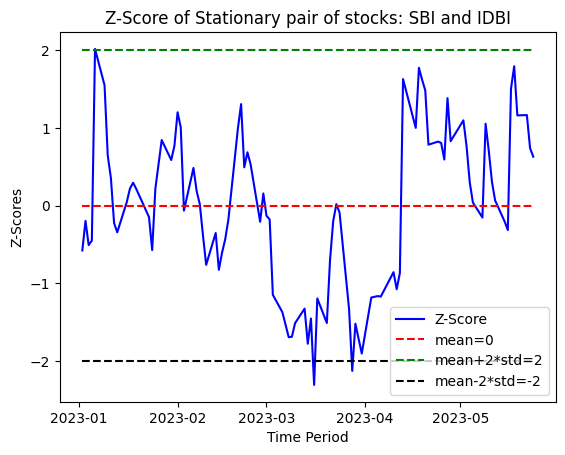

In [ ]:
x_axis=final1.index
y_axis=final1['Z-Score']
z=final1['ZSc_mean']
b=final1['ZSc_mean+2Std']
c=final1['ZSc_mean-2Std']

plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.title("Z-Score of Stationary pair of stocks: SBI and IDBI")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

The Z-Score of the ratios of close values of Non-Stationary Stocks

In [ ]:
final2['Z-Score']=(final2['Close_final']-final2['mean'])/final2['std']

In [ ]:
final2['ZSc_mean']=final2['Z-Score'].mean()
final2['ZSc_mean+2Std']=final2['Z-Score'].mean()+2*final2['Z-Score'].std()
final2['ZSc_mean-2Std']=final2['Z-Score'].mean()-2*final2['Z-Score'].std()

 Plotting the graph of Z-Score, Mean and ±2*std deviation v/s Time for the pair of non-stationary stocks (Amazon and Walmart)

Text(0, 0.5, 'Z-Scores')

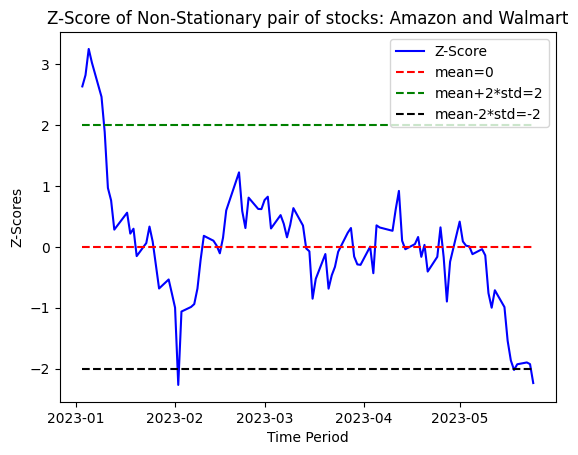

In [ ]:
x_axis=final2.index
y_axis=final2['Z-Score']
z=final2['ZSc_mean']
b=final2['ZSc_mean+2Std']
c=final2['ZSc_mean-2Std']

plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.title("Z-Score of Non-Stationary pair of stocks: Amazon and Walmart")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")

# TASK 3

Finding the sharpe ratio for the stock **Amazon** in the year 2022

In [ ]:
data = yf.download("AMZN", start="2022-01-01",end="2022-12-31")
data = data['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
portfolio = [0.40]
log_return = np.log(data/data.shift())*portfolio

In [ ]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio

-0.08952965683411189

In [ ]:
Annual_SR = sharpe_ratio*252**.5
Annual_SR

-1.4212392416880866

# TASK 4

 A **golden cross** is defined as the point where the short term SMA crosses above the long term SMA. It indicates a *Bullish breakout market* as long-term SMA have more weight, and short term going above it is incredible!


 On the other hand a **Death Cross** is defined as the point where the short term SMA cross below the long term SMA. It indicates a *Bearish market* and many investors buy stocks during this period based on their careful analysis.

Analysing Golden Cross for **Amazon**

In [ ]:
df=yf.download("AMZN", start="2021-01-01",end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


Used the 15 day short-term SMA and 50 day long-term SMA for analysis.

In [ ]:
df["15_sma"] = df["Adj Close"].rolling(15).mean()
df["50_sma"] = df["Adj Close"].rolling(50).mean()
df = df.dropna()

The SMA plots, showing Golden crosses and Death Crosses in the two years 2021 and 2022

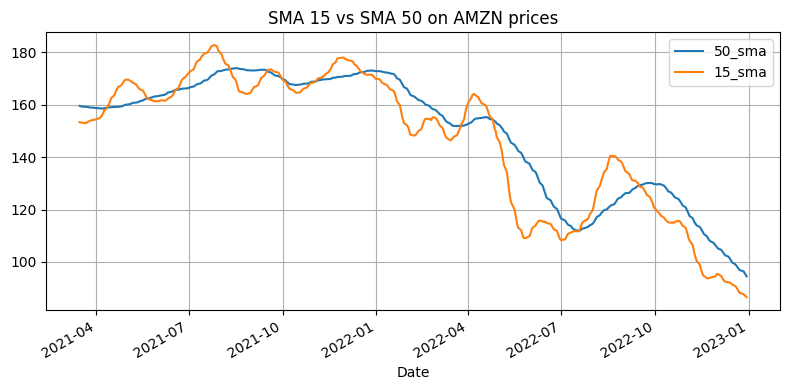

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(8,4))
df[["50_sma","15_sma"]].plot(figsize=(8,4), grid=True, title="SMA 15 vs SMA 50 on AMZN prices", ax=axes)

axes.legend()
fig.tight_layout()

# Finding the Golden Cross dates

Assigns 0 and 1 if short-term is lower or higher to long-term SMA respectively

In [ ]:
df["golden_cross_signal"] = df.apply(lambda row: 1 if row[f"15_sma"] > row[f"50_sma"]  else 0, axis=1)

<ipython-input-96-c52d3482079f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["golden_cross_signal"] = df.apply(lambda row: 1 if row[f"15_sma"] > row[f"50_sma"]  else 0, axis=1)


Finds the date of golden_cross in the given time period

In [ ]:
list_golden_cross_ts = []
first_golden_cross = False

In [ ]:
for idx, each in df["golden_cross_signal"].iteritems():
    if each == 1:
        # If its the first golden cross we see we add the timestamp
        if first_golden_cross:
            list_golden_cross_ts.append(idx)
            first_golden_cross = False
    else:
        first_golden_cross = True

<ipython-input-98-d97a0418af68>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, each in df["golden_cross_signal"].iteritems():


Prints the dates of Golden Crosses

In [ ]:
list_golden_cross_ts

[Timestamp('2021-04-13 00:00:00'),
 Timestamp('2021-06-21 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-07-20 00:00:00')]

# Finding the Death Cross Dates

Assigns 0 and 1 if short-term is lower or higher to long-term SMA respectively

In [ ]:
df["death_cross_signal"] = df.apply(lambda row: 1 if row[f"15_sma"] > row[f"50_sma"]  else 0, axis=1)

<ipython-input-100-d334f304b5f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["death_cross_signal"] = df.apply(lambda row: 1 if row[f"15_sma"] > row[f"50_sma"]  else 0, axis=1)


Finds the date of Death cross in the given time period

In [ ]:
list_death_cross_ts = []
first_death_cross = False

In [ ]:
for idx, each in df["death_cross_signal"].iteritems():
    if each == 0:
        # If its the first golden cross we see we add the timestamp
        if first_death_cross:
            list_death_cross_ts.append(idx)
            first_death_cross = False
    else:
        first_death_cross = True

<ipython-input-102-aa407601c4d3>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, each in df["death_cross_signal"].iteritems():


Prints the dates of Death Crosses

In [ ]:
list_death_cross_ts

[Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-08-11 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-12-20 00:00:00'),
 Timestamp('2022-04-26 00:00:00'),
 Timestamp('2022-09-16 00:00:00')]